# Detecção de Outliers com Random Cut

## Tratamento dos Dados

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [5]:
base = pd.read_csv('train.csv')
base

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
base = pd.read_csv('train.csv', parse_dates=['datetime'], index_col = 0)
base

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [7]:
base.drop(columns = ['season', 'holiday','workingday','weather','temp','atemp', 'humidity','windspeed','casual', 'registered'], axis = 1, inplace = True)
base

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168


In [8]:
base = base.groupby(pd.Grouper(freq = 'D')).sum()
base

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


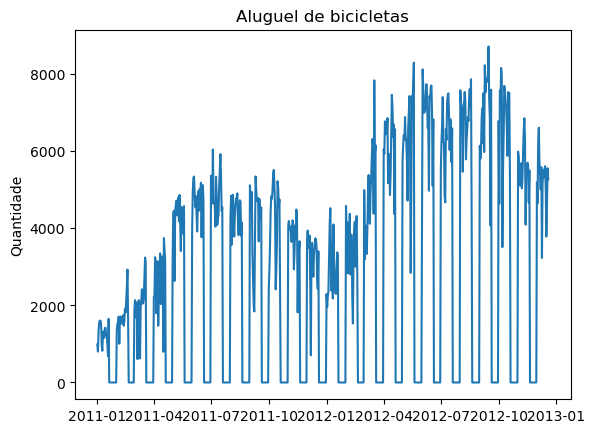

In [9]:
plt.plot(base['count'])
plt.ylabel('Quantidade')
plt.title('Aluguel de bicicletas');

## Configuração SageMaker

In [10]:
import boto3
import sagemaker
from sagemaker import RandomCutForest

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [11]:
session = sagemaker.Session()
bucket = 'emanuelle-sprint04'
subpasta_dataset = 'datasets/bike/random-cut'
subpasta_modelo = 'modelos/bike/random-cut'
key = 'bike-random-cut'
s3_data = 's3://{}/{}/{}'.format(bucket, subpasta_dataset, key)
output_location = 's3://{}/{}'.format(bucket, subpasta_modelo)
role = sagemaker.get_execution_role()
boto3.Session().client('s3').head_bucket(Bucket = bucket)
print('Localização da base de dados: ', s3_data)
print('Localização do modelo: ', output_location)

Localização da base de dados:  s3://emanuelle-sprint04/datasets/bike/random-cut/bike-random-cut
Localização do modelo:  s3://emanuelle-sprint04/modelos/bike/random-cut


## Treinamento do Random Cut

In [12]:
base['count'].to_numpy().reshape(-1,1).shape

(719, 1)

In [13]:
random_cut = RandomCutForest(role = role,
                             instance_count = 1,
                             instance_type = 'ml.m5.large',
                             data_location = s3_data,
                             output_path = output_location,
                             use_spot_instances = False,
                             max_run = 3600)

In [14]:
random_cut.fit(random_cut.record_set(base['count'].to_numpy().reshape(-1,1)))

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: randomcutforest-2025-01-08-18-17-28-435


2025-01-08 18:17:29 Starting - Starting the training job...
2025-01-08 18:17:45 Starting - Preparing the instances for training...
2025-01-08 18:18:21 Downloading - Downloading input data......
2025-01-08 18:19:06 Downloading - Downloading the training image......
2025-01-08 18:20:22 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:495: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if cons['type'] is 'ineq':
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:743: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(self.X_min) is not 0:
[01/08/2025 18:20:30 INFO 140188085995328] Reading default configuration fro

## Deploy e Inferências

In [15]:
random_cut_bikes = random_cut.deploy(initial_instance_count = 1, instance_type = 'ml.m5.large')

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating model with name: randomcutforest-2025-01-08-18-26-59-425
INFO:sagemaker:Creating endpoint-config with name randomcutforest-2025-01-08-18-26-59-425
INFO:sagemaker:Creating endpoint with name randomcutforest-2025-01-08-18-26-59-425


--------!

In [16]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer
random_cut_bikes.serializer = CSVSerializer()
random_cut_bikes.deserializer = JSONDeserializer()

In [17]:
base_numpy = base['count'].to_numpy().reshape(-1,1)

In [18]:
previsoes = random_cut_bikes.predict(base_numpy)
previsoes

{'scores': [{'score': 1.8493764349},
  {'score': 1.8737498281},
  {'score': 1.8019819998},
  {'score': 1.7580666782},
  {'score': 1.7540862855},
  {'score': 1.7531960916},
  {'score': 1.7665391455},
  {'score': 1.8496747622},
  {'score': 1.8809078133},
  {'score': 1.804947168},
  {'score': 1.8120083594},
  {'score': 1.8286932592},
  {'score': 1.7893960187},
  {'score': 1.7890254869},
  {'score': 1.8154858399},
  {'score': 1.8244569642},
  {'score': 1.8433264997},
  {'score': 1.8859951237},
  {'score': 1.7640090963},
  {'score': 1.5151263051},
  {'score': 1.5151263051},
  {'score': 1.5151263051},
  {'score': 1.5151263051},
  {'score': 1.5151263051},
  {'score': 1.5151263051},
  {'score': 1.5151263051},
  {'score': 1.5151263051},
  {'score': 1.5151263051},
  {'score': 1.5151263051},
  {'score': 1.5151263051},
  {'score': 1.5151263051},
  {'score': 1.8004813951},
  {'score': 1.7610265194},
  {'score': 1.76334323},
  {'score': 1.7470471109},
  {'score': 1.8555756489},
  {'score': 1.7529068

In [19]:
previsoes = [p['score'] for p in previsoes['scores']]

In [20]:
previsoes[0:5]

[1.8493764349, 1.8737498281, 1.8019819998, 1.7580666782, 1.7540862855]

In [21]:
base['score'] = pd.Series(previsoes, index = base.index)
base

,count,score
datetime,,
2011-01-01,985,1.849376
2011-01-02,801,1.873750
2011-01-03,1349,1.801982
2011-01-04,1562,1.758067
2011-01-05,1600,1.754086
...,...,...
2012-12-15,5047,1.626304
2012-12-16,3786,1.600167
2012-12-17,4585,1.589570


In [22]:
base.describe()

,count,score
count,719.000000,719.000000
mean,2900.522949,1.644345
std,2659.328686,0.143085
min,0.000000,1.515126
25%,0.000000,1.515126
50%,2935.000000,1.598699
75%,5027.500000,1.730885
max,8714.000000,2.176560


In [24]:
# Para melhorar a visualização no gráfico
min(previsoes), max(previsoes), 1.4 * max(previsoes)

(1.5151263051, 2.1765603515, 3.0471844921)

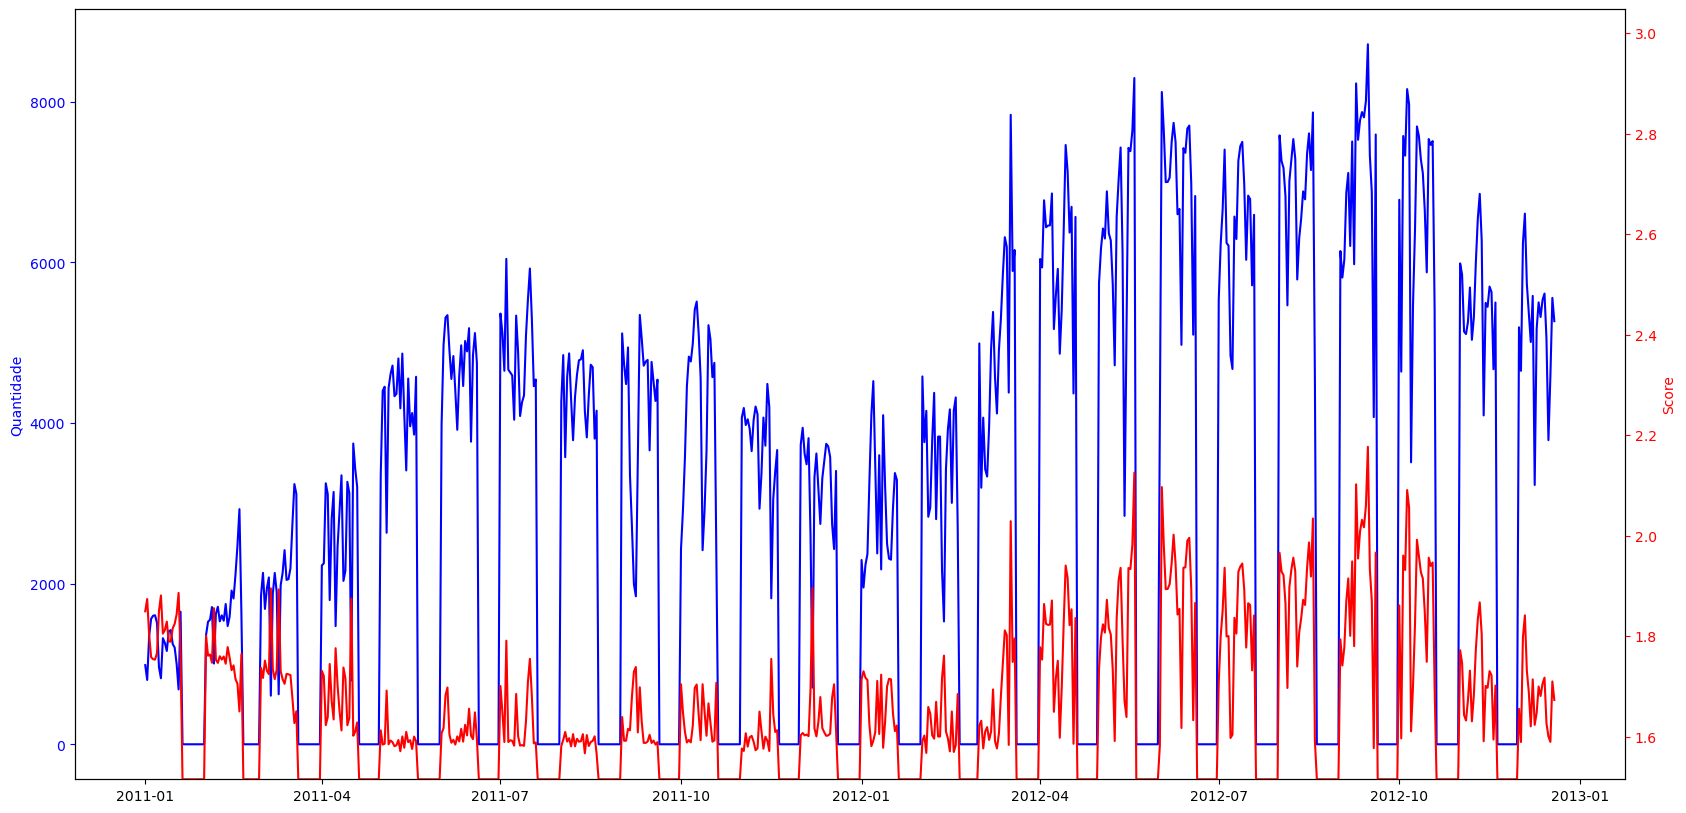

In [25]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx() # usada para criar um novo eixo independente

ax1.plot(base['count'], color = 'b')
ax2.plot(base['score'], color = 'r')

ax1.set_ylabel('Quantidade', color = 'b')
ax2.set_ylabel('Score', color = 'r')

ax1.tick_params('y', colors = 'b')
ax2.tick_params('y', colors = 'r')

ax2.set_ylim(min(previsoes), 1.4 * max(previsoes));

In [26]:
# Usando estatística descritiva para identifcar outliers (usando Score)
media_score = base['score'].mean()
media_score

1.644345163706398

In [27]:
desvio_padrao_score = base['score'].std()
desvio_padrao_score

0.14308512318920938

In [29]:
corte_score = media_score + 3 * desvio_padrao_score
corte_score

2.073600533274026

In [30]:
outliers = base[base['score'] > corte_score]
outliers

,count,score
datetime,,
2012-05-19,8294,2.125206
2012-06-02,8120,2.096519
2012-09-09,8227,2.101905
2012-09-15,8714,2.176560
2012-10-05,8156,2.090584


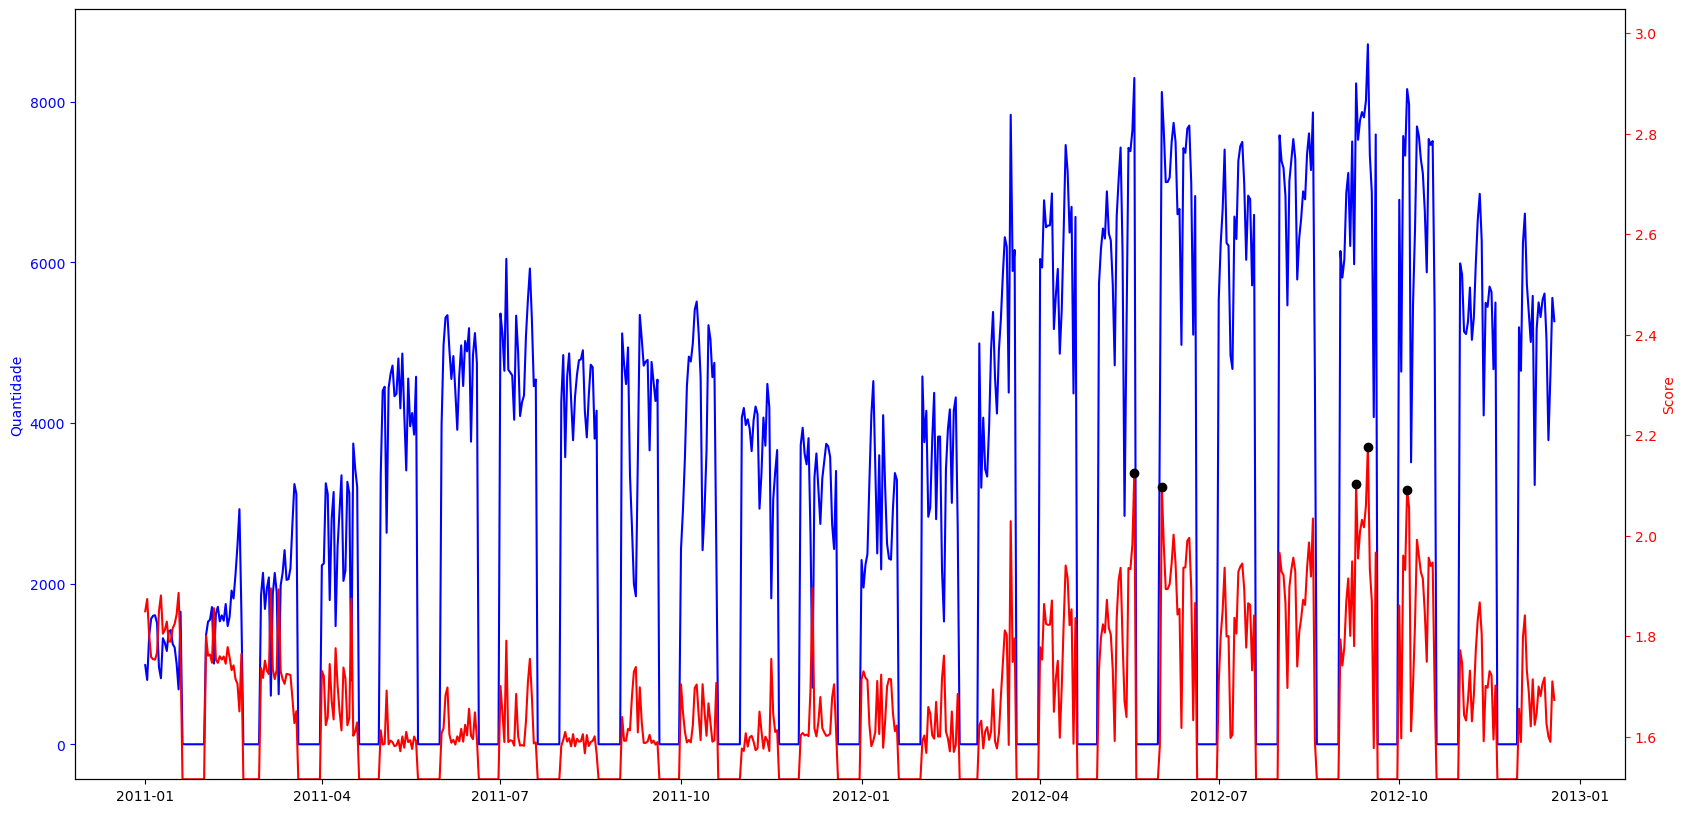

In [31]:
ax2.plot(outliers.index, outliers['score'], 'ko')
fig